## Exploratory Data Analysis for Data Analysts in the US

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Italy Data Analyst roles

In [2]:
df_DA_IT = df[(df['job_country'] == 'Italy') & (df['job_title_short'] == 'Data Analyst')]

### Locations to Explore:

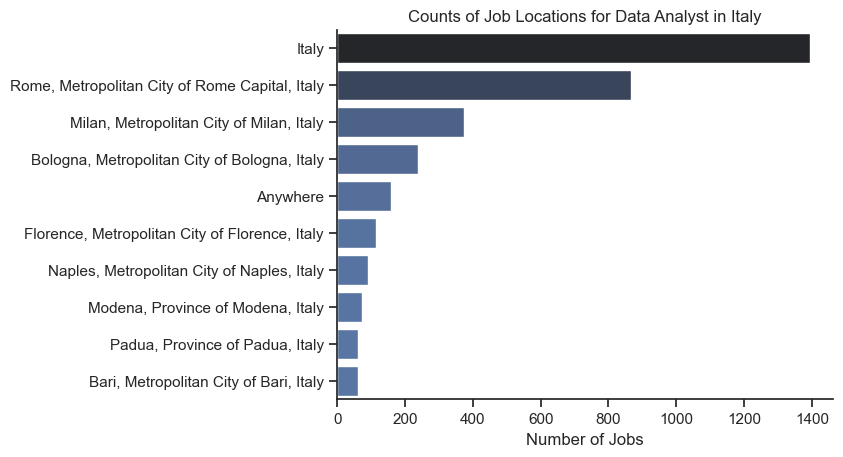

In [4]:
df_plot = df_DA_IT['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Italy')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

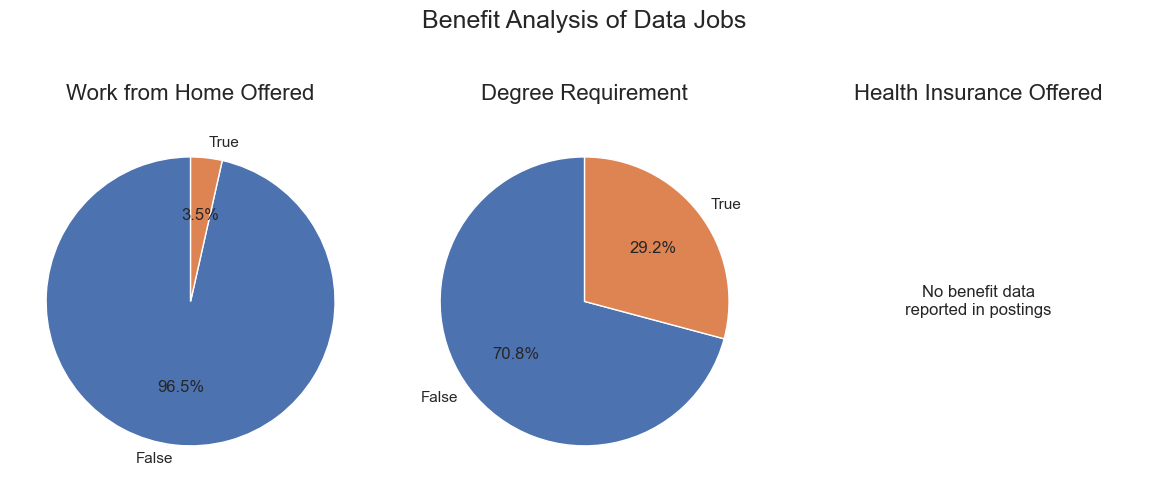

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))
counts = df_DA_IT[column].value_counts()



for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_IT[column].value_counts()

    ax[i].set_title(title, fontsize=16, pad=15)

    if df_DA_IT[column].nunique() == 1:
        ax[i].text(
        0.5, 0.5,
        "No benefit data\nreported in postings",
        ha='center',
        va='center',
        fontsize=12
    )
        ax[i].axis('off')
    else:
        ax[i].pie(
        counts,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
        )
        

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

### Companies to Explore:

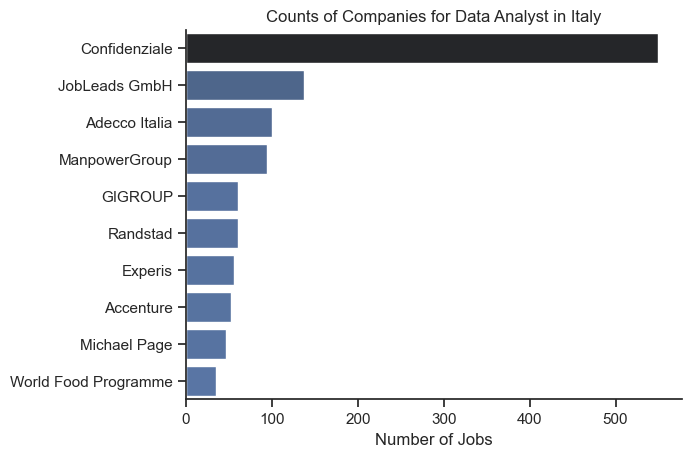

In [29]:
df_plot = df_DA_IT['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Italy')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()